In [33]:
# Importing neccessary pacakages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [34]:
import pandas as pd
data = pd.read_csv("jobs.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [35]:
# Checking the shape of the data (dimensions)
data.shape

# 899 rows and 17 columns

(899, 17)

In [36]:
data.head()

,treat,econ_hard,depress1,sex,age,occp,marital,nonwhite,educ,income,job_seek,depress2,work1,comply,control,job_dich,job_disc
1,1,3.00,1.91,1,34.167122,professionals,married,non.white1,gradwk,50k+,4.833333,1.727273,psyemp,0,treat,1,4
2,1,3.67,1.36,0,26.101370,operatives/kindred wrks,nevmarr,white0,somcol,15t24k,3.833333,2.000000,psyemp,0,treat,0,3
3,1,4.00,2.09,1,35.021919,operatives/kindred wrks,nevmarr,non.white1,somcol,25t39k,4.500000,2.181818,psyump,0,treat,1,4
4,0,2.33,1.45,0,27.487671,manegerial,married,white0,bach,25t39k,3.666667,1.545455,psyump,0,control,0,3
5,1,1.33,1.73,1,31.610958,clerical/kindred,separtd,non.white1,highsc,25t39k,2.500000,2.363636,psyump,1,treat,0,2


# Answer to Question 2 :


The key objective of the case study is :
Model to determine the two key outcome variables; a continuous measure of depressive symptoms based on the Hopkins Symptom Checklist, and a binary variable, representing whether the respondent had become employed.

The response variable : work1 (Indicator variable for employment. 1 = employed)
The data collected in the given excel file is grouped under which data class : "Cross Sectional Data"

# Answer to Question 3 :

In [37]:
data.describe()

,treat,econ_hard,depress1,sex,age,job_seek,depress2,comply,job_dich,job_disc
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,0.667408,3.024138,1.870033,0.536151,37.565063,4.043344,1.741402,0.413793,0.617353,3.125695
std,0.471404,0.986436,0.565909,0.498969,10.451433,0.728431,0.651730,0.492786,0.486304,0.760082
min,0.000000,1.000000,1.000000,0.000000,17.487671,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,2.330000,1.360000,0.000000,29.300000,3.666667,1.272727,0.000000,0.000000,3.000000
50%,1.000000,3.000000,1.830000,1.000000,36.635616,4.166667,1.600000,0.000000,1.000000,3.000000
75%,1.000000,3.670000,2.360000,1.000000,44.623287,4.666667,2.090909,1.000000,1.000000,4.000000
max,1.000000,5.000000,3.000000,1.000000,72.479454,5.000000,4.909091,1.000000,1.000000,4.000000


In [38]:
# Observations :
# There are no missing values in the dataset
# The mean age is 37.5

In [39]:
data.dtypes

treat          int64
econ_hard    float64
depress1     float64
sex            int64
age          float64
occp          object
marital       object
nonwhite      object
educ          object
income        object
job_seek     float64
depress2     float64
work1         object
comply         int64
control       object
job_dich       int64
job_disc       int64
dtype: object

# Answer to Question 4 :

Plotting a histogram for the variable 'Age'

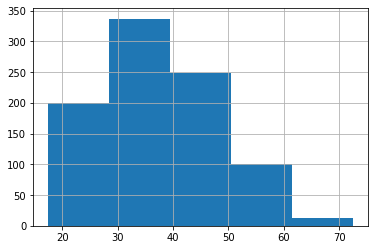

In [40]:
data.round({"age":0}) 
data['age'].hist(bins=5)

# Answer to Question 5 :

In [41]:
data['work1'] = data['work1'].map({'psyemp': 1, 'psyump': 0})

# Answer to Question 6:

In [42]:
# Categorizing the label for identifying different variable inisghts
def normalizingRange(x):
    if x <= 1:
        return 1
    elif x <= 2 and x >1:
        return 2
    elif x <= 3  and x >2:
        return 3
    elif x <= 4  and x >3:
        return 4
    else:
        return 5

In [43]:
data['job_seek'] = data['job_seek'].apply(normalizingRange)
data['depress2'] = data['depress2'] .apply(normalizingRange)
data['depress1'] = data['depress1'] .apply(normalizingRange)

In [44]:
data.head(5)

,treat,econ_hard,depress1,sex,age,occp,marital,nonwhite,educ,income,job_seek,depress2,work1,comply,control,job_dich,job_disc
1,1,3.00,2,1,34.167122,professionals,married,non.white1,gradwk,50k+,5,2,1,0,treat,1,4
2,1,3.67,2,0,26.101370,operatives/kindred wrks,nevmarr,white0,somcol,15t24k,4,2,1,0,treat,0,3
3,1,4.00,3,1,35.021919,operatives/kindred wrks,nevmarr,non.white1,somcol,25t39k,5,3,0,0,treat,1,4
4,0,2.33,2,0,27.487671,manegerial,married,white0,bach,25t39k,4,2,0,0,control,0,3
5,1,1.33,2,1,31.610958,clerical/kindred,separtd,non.white1,highsc,25t39k,3,3,0,1,treat,0,2


# Answer to Question 7:

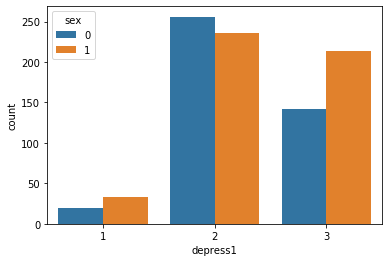

In [45]:
# Identifying the count for the varaible depress1(pre-treatment) against Male/Female 0/1

# We have splitted the label in the range form such as 0-1 belongs 1, 1-2 belongs 2, 2-3 belongs 3

sns.countplot(x="depress1",hue="sex", data=data)

# Answer to Question 8:

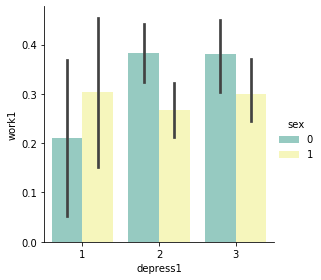

In [46]:
# Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  
# agianst Depress1 and Sex predictor variables

#Depression pre-treatment

sns.factorplot(x="depress1", y="work1", data=data, hue="sex",kind="bar", size =4, palette = "Set3")

# Answer to Question 9:

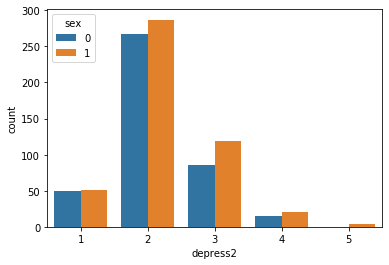

In [47]:
# Identifying the count for the varaible depress2(post-treatment) against Male/Female 0/1
#Depression 2 post treatment

sns.countplot(x="depress2",hue="sex", data=data)

# Answer to Question 10:

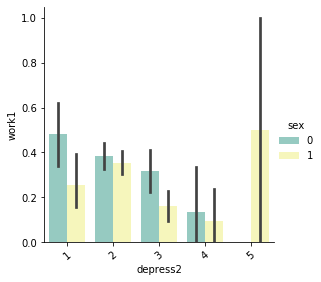

In [48]:
# Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),
# against Depress2 and Sex (predictor variables)

# Can observe that in the scale of 1 to 5, Female are only standing in scale 5

sns.factorplot(x="depress2", y="work1", data=data, hue="sex",kind="bar", size =4, palette = "Set3")
plt.xticks(rotation=40);

# Answer to Question 11:

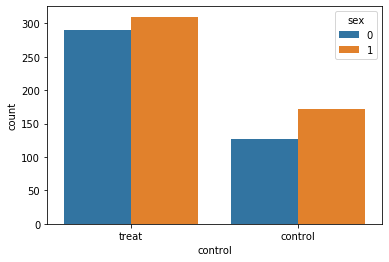

In [49]:
# Identifying the count for the varaible control(treat/control) against Male/Female 0/1

# Treat are the one who had been picked up randomly for the Jobs training program, control are the one who picked up randomly,
# Female were the one who was more than male, which had been picked up randomly.

sns.countplot(x="control",hue="sex", data=data)

# Answer to Question 12:

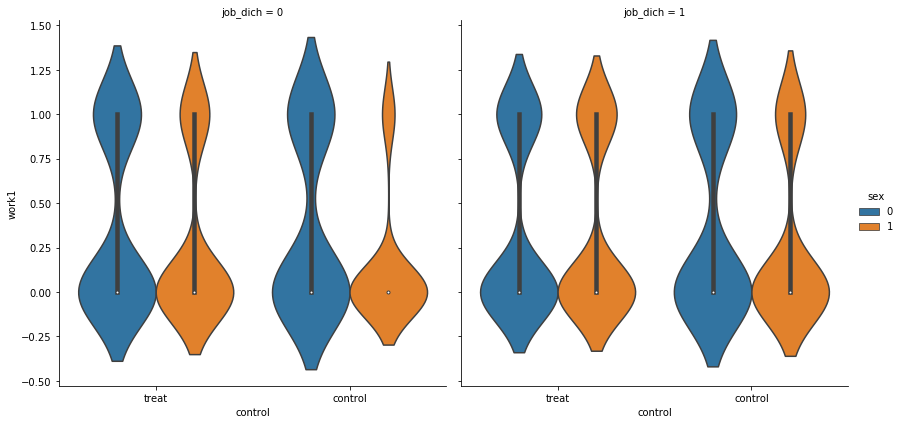

In [50]:
# Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  
# against job_dich, control and Sex (predictor variables)

#Checking againt the different variable i.e control and job dich from jobs training program
sns.factorplot(x="control", y="work1", data=data, hue="sex",kind="violin", size =6, scale="width", col="job_dich")

# Answer to Question 13:

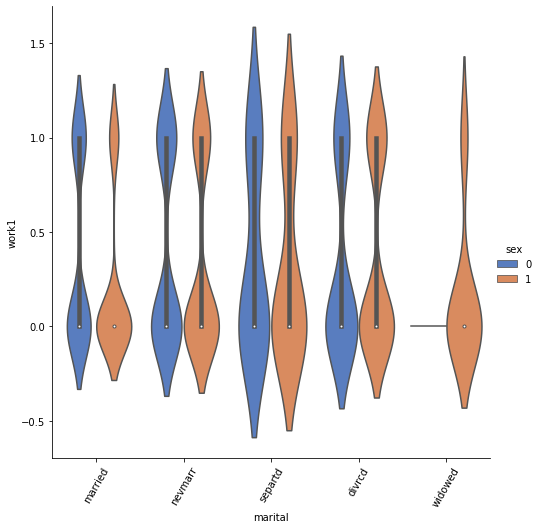

In [51]:
#Against Marital Status

sns.factorplot(x="marital",y="work1",hue="sex",data=data,kind="violin", size = 7, palette = "muted")
plt.xticks(rotation=60);


# Answer to Question 14:

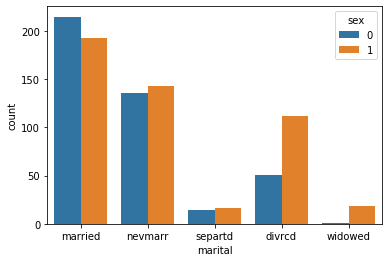

In [52]:
# Identifying the count for the variable marital against Male/Female 0/1

sns.countplot(x="marital",hue="sex", data=data)

# Answer to Question 15:

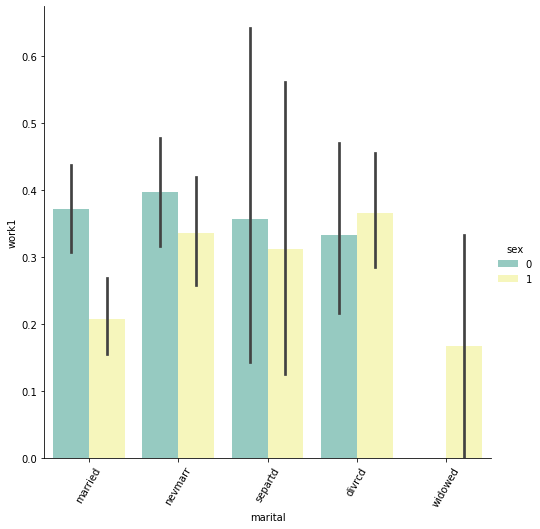

In [53]:
# Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  marital and Sex (predictor variables)

# Married and Never married male are the one who had been employed more then female 

sns.factorplot(x="marital",y="work1",hue="sex",data=data,kind="bar", size = 7, palette = "Set3")
plt.xticks(rotation=60);

# Answer to Question 16:

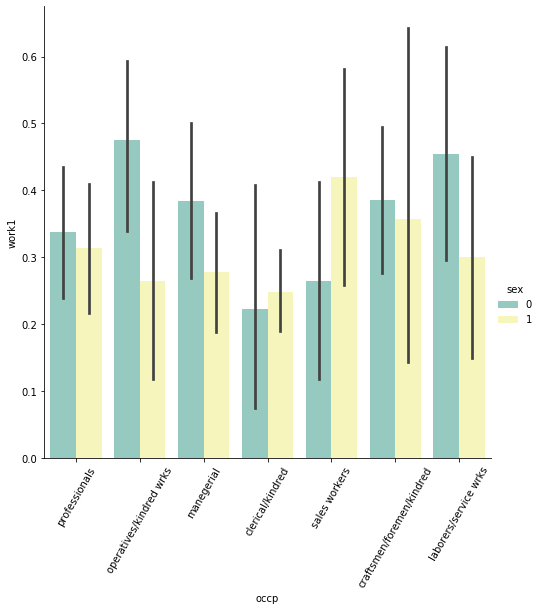

In [54]:
# Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  occupation and Sex (predictor variables)

# Except sales workers, in all other field Male are the one who has been employed

sns.factorplot(x="occp",y="work1",hue="sex",data=data,kind="bar", size = 7, palette = "Set3")
plt.xticks(rotation=60);

# Answer to Question 17:

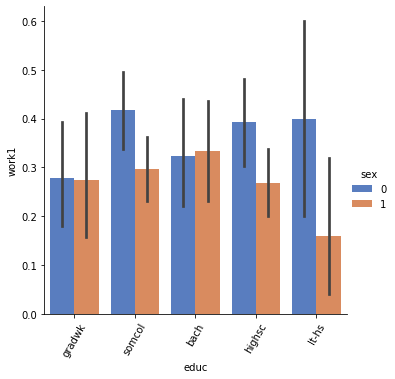

In [55]:
# Visualization of response variable i.e. Work1 (Employed/UnEmployed) (1/0),  education and Sex (predictor variables)

sns.factorplot(x="educ",y="work1",hue="sex",data=data,kind="bar", size = 5, palette = "muted")
plt.xticks(rotation=60);

# Answer to Question 18:

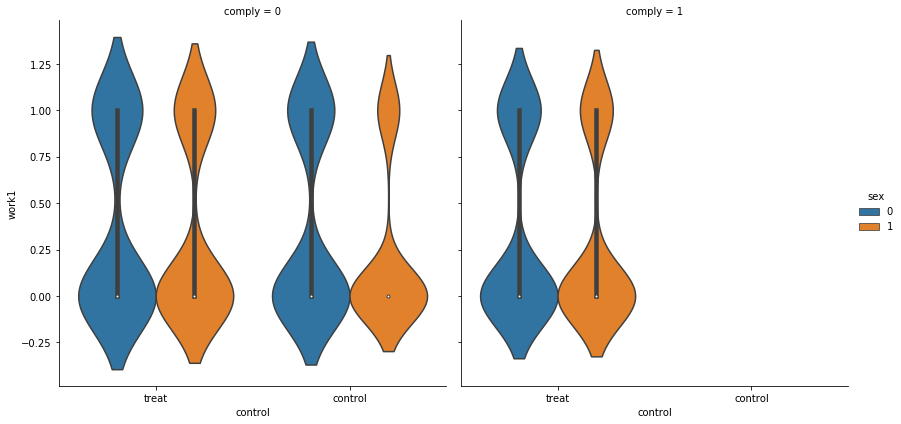

In [56]:
# Identifying the comply, after the person has been enrolled for the job proram.

#Checking againt the different variable i.e control and comploy for jobs training program

sns.factorplot(x="control", y="work1", data=data, hue="sex",kind="violin", size =6, scale="width", col="comply")

# Answer to Question 19:

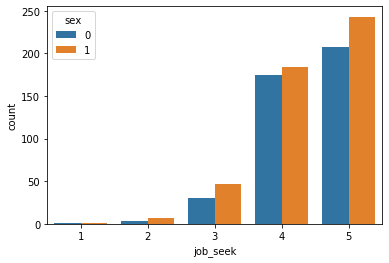

In [57]:
sns.countplot(x="job_seek",hue="sex", data=data)

# Answer to Question 20:

In [58]:
# Which algorithm we can choose here and why ?

# Since we are dealing with the factor variable here, so we can implement the Supervised Algorithm given that we have the label set
# as True/False, Logistic regerssion would suffice this problem

# Objective of any logit model is to "maximize likelihood estimation"

# How do we achieve this objective ?

# A probability distribution for the target variable (class label) must be assumed and 
# then a likelihood function defined that calculates the probability of observing the outcome given the input data and the model. 
# This function can then be optimized to find the set of parameters that results in the largest sum likelihood over the training dataset.


In [59]:
data.groupby('work1').mean()

,treat,econ_hard,depress1,sex,age,job_seek,depress2,comply,job_dich,job_disc
work1,,,,,,,,,,
0,0.648515,3.032393,2.328383,0.569307,38.723419,4.376238,2.270627,0.410891,0.600660,3.089109
1,0.706485,3.007065,2.354949,0.467577,35.169283,4.409556,2.078498,0.419795,0.651877,3.201365


# Answer to Question 21:

In [62]:
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
y, X = dmatrices('work1 ~ depress1 + depress2 + age + sex + comply + job_dich + job_disc + econ_hard', data, return_type="dataframe")
print(X.columns)
#flattern y into a 1-D array
y = np.ravel(y)

Index(['Intercept', 'depress1', 'depress2', 'age', 'sex', 'comply', 'job_dich',
       'job_disc', 'econ_hard'],
      dtype='object')


In [63]:
#model evaluation by train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=0)
model1=LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#predict labels for  test set
predicted = model1.predict(X_test)

In [65]:
#Generate class probabilities
probs = model1.predict_proba(X_test)
# probs

# Answer to Question 22

In [66]:
#generate evaluation metrics
from sklearn import metrics
print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test, probs[:,1]))
#The accuracy is 66% , which is the same as we experienced when training and predicting on the same data

0.6592592592592592
0.6758060576453346


In [67]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[172   6]
 [ 86   6]]
              precision    recall  f1-score   support

         0.0       0.67      0.97      0.79       178
         1.0       0.50      0.07      0.12        92

    accuracy                           0.66       270
   macro avg       0.58      0.52      0.45       270
weighted avg       0.61      0.66      0.56       270



# Answer to Question 23:

In [68]:
from sklearn.model_selection import cross_val_score
# evaluate the model using cross-validation
scores = cross_val_score(LogisticRegression(),X,y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean)

[0.7        0.68888889 0.58888889 0.65555556 0.71111111 0.68888889
 0.67777778 0.62222222 0.64444444 0.68539326]
<built-in method mean of numpy.ndarray object at 0x000001A5CA456580>


In [70]:
model1.predict_proba(np.array([[1,1,0,0,0,0,0,0,0]]))

array([[0.29400447, 0.70599553]])